Đang huấn luyện mô hình: Basic CNN
Epoch 1/10
3111/3111 - 261s - loss: 0.4674 - accuracy: 0.8682 - val_loss: 0.1311 - val_accuracy: 0.9620 - 261s/epoch - 84ms/step
Epoch 2/10
3111/3111 - 229s - loss: 0.2254 - accuracy: 0.9357 - val_loss: 0.0936 - val_accuracy: 0.9733 - 229s/epoch - 74ms/step
Epoch 3/10
3111/3111 - 231s - loss: 0.1860 - accuracy: 0.9466 - val_loss: 0.0871 - val_accuracy: 0.9744 - 231s/epoch - 74ms/step
Epoch 4/10
3111/3111 - 224s - loss: 0.1652 - accuracy: 0.9523 - val_loss: 0.0806 - val_accuracy: 0.9773 - 224s/epoch - 72ms/step
Epoch 5/10
3111/3111 - 237s - loss: 0.1514 - accuracy: 0.9567 - val_loss: 0.0714 - val_accuracy: 0.9791 - 237s/epoch - 76ms/step
Epoch 6/10
3111/3111 - 237s - loss: 0.1394 - accuracy: 0.9594 - val_loss: 0.0668 - val_accuracy: 0.9805 - 237s/epoch - 76ms/step
Epoch 7/10
3111/3111 - 271s - loss: 0.1333 - accuracy: 0.9609 - val_loss: 0.0678 - val_accuracy: 0.9805 - 271s/epoch - 87ms/step
Epoch 8/10
3111/3111 - 276s - loss: 0.1269 - accuracy: 0.9626 

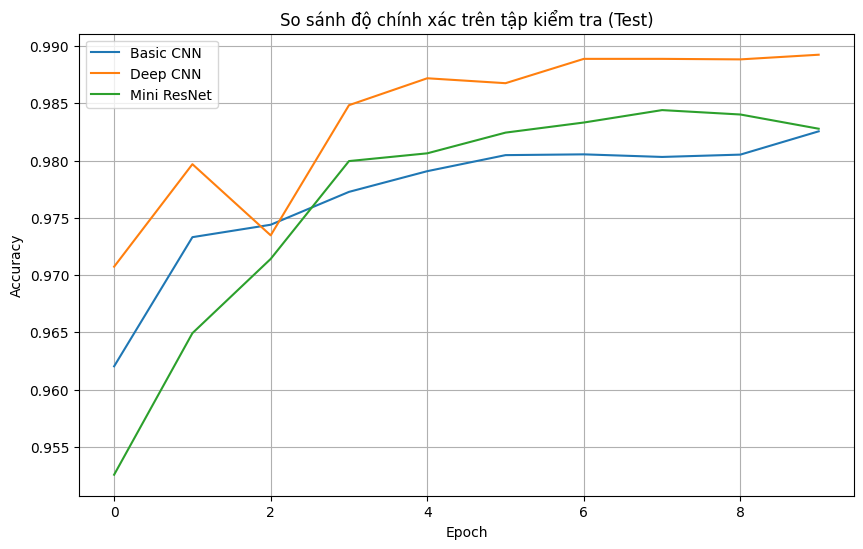


Bảng tổng kết kết quả:
Basic CNN: Train Acc = 98.57%, Test Acc = 98.26%
Deep CNN: Train Acc = 99.22%, Test Acc = 98.92%
Mini ResNet: Train Acc = 98.46%, Test Acc = 98.28%


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Add, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Load dữ liệu
def load_mnist_from_folder(folder, label_csv):
    df = pd.read_csv(label_csv)
    images = []
    labels = []
    for _, row in df.iterrows():
        img_path = os.path.join(folder, row["filename"])
        img = Image.open(img_path).convert("L")
        img = np.array(img).reshape(28, 28, 1).astype("float32") / 255.0
        images.append(img)
        labels.append(int(row["label"]))
    return np.array(images), np.array(labels)

x_mnist_train, y_mnist_train = load_mnist_from_folder(r"F:\DAKHMT\CLone\Hand-Written\datas\mnist_dataset\train", r"F:\DAKHMT\CLone\Hand-Written\datas\mnist_dataset\train_labels.csv")
x_mnist_test, y_mnist_test = load_mnist_from_folder(r"F:\DAKHMT\CLone\Hand-Written\datas\mnist_dataset\test", r"F:\DAKHMT\CLone\Hand-Written\datas\mnist_dataset\test_labels.csv")

x_mnist = np.concatenate([x_mnist_train, x_mnist_test], axis=0)
y_mnist = np.concatenate([y_mnist_train, y_mnist_test], axis=0)

df_az = pd.read_csv(r'F:\DAKHMT\CLone\Hand-Written\datas\A_Z Handwritten Data.csv')
X_az = df_az.drop("0", axis=1).values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_az = df_az["0"].values.astype(np.int32) + 10

X = np.concatenate([x_mnist, X_az], axis=0)
y = np.concatenate([y_mnist, y_az], axis=0)

num_classes = 36
y_cat = to_categorical(y, num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.1, random_state=42)

# Hàm tạo model CNN cơ bản
def create_basic_cnn():
    model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(36, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hàm tạo Deep CNN
def create_deep_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
        BatchNormalization(),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(36, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hàm tạo Mini ResNet
def create_mini_resnet():
    inputs = Input(shape=(28,28,1))
    
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    shortcut = x
    x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.25)(x)
    
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    shortcut = x
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = MaxPooling2D((2,2))(x)
    x = Dropout(0.25)(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(36, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Huấn luyện và đánh giá
models = {
    "Basic CNN": create_basic_cnn(),
    "Deep CNN": create_deep_cnn(),
    "Mini ResNet": create_mini_resnet()
}

history_list = {}
results = {}

for name, model in models.items():
    print(f"Đang huấn luyện mô hình: {name}")
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=2)
    history_list[name] = history
    
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    results[name] = {
        "train_acc": train_acc,
        "test_acc": test_acc
    }
    print(f"{name} - Train Accuracy: {train_acc*100:.2f}%, Test Accuracy: {test_acc*100:.2f}%")
    print("="*60)

# Vẽ biểu đồ so sánh độ chính xác
plt.figure(figsize=(10,6))
for name, history in history_list.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')
plt.title('So sánh độ chính xác trên tập kiểm tra (Test)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# In bảng tổng kết
print("\nBảng tổng kết kết quả:")
for name, metrics in results.items():
    print(f"{name}: Train Acc = {metrics['train_acc']*100:.2f}%, Test Acc = {metrics['test_acc']*100:.2f}%")